In [2]:
import sympy as sym

def lagrange_interpolation(val_x, val_fx):
    x = sym.symbols('x') 
    N = len(val_x)
    lagrangePoly = 0
    for i in range(N):
        lagrangeMult = 1  # reset lagrange multiplier given different i
        for j in range(N):
            if i != j:
                lagrangeMult *= (x - val_x[j]) / (val_x[i] - val_x[j])  # lagrange multiplier
        lagrangePoly += lagrangeMult * val_fx[i]  # sum of base poly with their respective coeff
    return lagrangePoly

In [3]:
def div_differences_herm(val_x, val_fx, val_dfx, val_d2fx=[]):
    if len(val_x) == 1:
        return val_fx[0]
    elif (len(val_x) == 2) & (val_x[0] == val_x[1]):
        return val_dfx[0]  # f[x_i,x_i]=f'(x_i)/1!
    elif (len(val_x) == 3) & (val_x[0] == val_x[1] == val_x[2]) & (len(val_d2fx)!=0):
        return val_d2fx[0] / 2  # f[x_i,x_i,x_i]=f''(x_i)/2!
    return (
        div_differences_herm(val_x[1:], val_fx[1:], val_dfx[1:], val_d2fx[1:]) 
        - div_differences_herm(val_x[:-1], val_fx[:-1], val_dfx[:-1], val_d2fx[:-1])
        ) / (val_x[-1] - val_x[0])

In [4]:
import sympy as sym

def hermite_interpolation(val_x, val_fx, val_dfx, val_d2fx=[]):
    x = sym.symbols('x')
    N = len(val_x)
    poly = 0
    z = []; fz = []; dfz = []; d2fz = []
    if len(val_d2fx)==0:
        for i in range (N):
            z.extend([val_x[i], val_x[i]])
            fz.extend([val_fx[i], val_fx[i]])
            dfz.extend([val_dfx[i], val_dfx[i]])
    else:
        for i in range (N):
            z.extend([val_x[i], val_x[i], val_x[i]])
            fz.extend([val_fx[i], val_fx[i], val_fx[i]])
            dfz.extend([val_dfx[i], val_dfx[i], val_dfx[i]])
            d2fz.extend([val_d2fx[i], val_d2fx[i], val_d2fx[i]])
    for k in range (0, len(z)):
        if k == 0:  # f[z_0] is not multiplied by anything
            mult = 1  
        else:
            mult *= (x - z[k-1])
        if len(val_d2fx)==0:  # if there is data about second derivative
            poly += div_differences_herm(z[:k+1], fz[:k+1], dfz[:k+1]) * mult
            continue
        poly += div_differences_herm(z[:k+1], fz[:k+1], dfz[:k+1], d2fz[:k+1]) * mult
    return poly

In [5]:
import numpy as np

def sin_2(x):
    return np.sin(x)**2

def dsin_2(x):
    return 2 * np.sin(x) * np.cos(x)

In [26]:
N = 10
xn = np.linspace(0, 2 * np.pi, N)
yn = sin_2(xn)
dyn = dsin_2(xn)

x = sym.symbols('x')
lag_int = sym.utilities.lambdify(x, lagrange_interpolation(xn, yn))
hem_int = sym.utilities.lambdify(x, hermite_interpolation(xn, yn, dyn))

Hermite>>>>Lagrange


<Figure size 720x576 with 0 Axes>

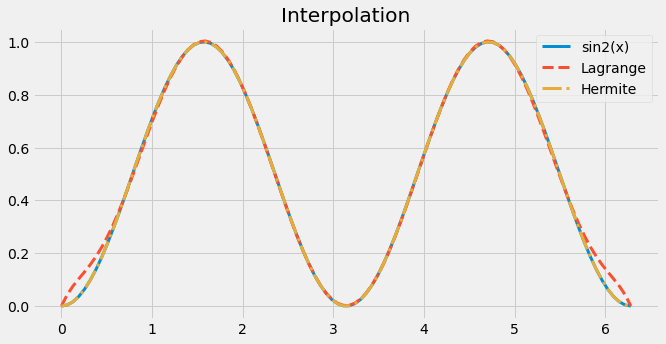

In [76]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

xdata = np.linspace(0, 2 * np.pi, 100)

ax.plot(xdata, sin_2(xdata), lw='3', label='sin2(x)')
ax.plot(xdata, lag_int(xdata), lw='3', ls='--', label='Lagrange')
ax.plot(xdata, hem_int(xdata), lw='3', ls='-.', label='Hermite')
ax.set_title('Interpolation')
ax.legend()

print('Hermite>>>>Lagrange')